In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
plt.style.use('fivethirtyeight') 
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
rcParams['figure.figsize'] = 10, 6
import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("./Data/"))

['Clean_test_data.csv', 'Clean_train_data.csv', 'holidays.xlsx', 'processed_test.csv', 'processed_train.csv', 'promotional_expense.csv', 'sample_submission.csv', 'yds_test2018.csv', 'yds_train2018.csv']


In [3]:
holidays = pd.read_excel('data/holidays.xlsx')
promotional = pd.read_csv('data/promotional_expense.csv')
train = pd.read_csv('data/yds_train2018.csv')
test = pd.read_csv('data/yds_test2018.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [6]:
train.tail()

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
79067,79068,2015,10,44,f000058,4,Finland,5169.66
79068,79069,2015,10,44,f000091,4,Finland,0.00
79069,79070,2015,10,44,f000097,4,Finland,0.00
79070,79071,2015,10,44,f0000122,4,Finland,0.00
79071,79072,2015,10,44,f0000130,4,Finland,0.00


In [7]:
test.tail()

,S_No,Year,Month,Product_ID,Country,Sales
100,79173,2016,3,4,Finland,NaN
101,79174,2016,4,4,Finland,NaN
102,79175,2016,5,4,Finland,NaN
103,79176,2016,6,4,Finland,NaN
104,79177,2016,7,4,Finland,NaN


In [6]:
holidays.head()

,Date,Country,Holiday
0,"2014, 1, 1",Denmark,Nytårsdag
1,"2014, 4, 17",Denmark,Skærtorsdag
2,"2014, 4, 18",Denmark,Langfredag
3,"2014, 4, 20",Denmark,Påskedag
4,"2014, 4, 21",Denmark,Anden påskedag


In [7]:
promotional.head()

,Year,Month,Country,Product_Type,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726


In [8]:
train.shape

(79072, 8)

In [9]:
test.shape

(105, 6)

In [10]:
train.Country.unique()

array(['Argentina', 'Belgium', 'Columbia', 'Denmark', 'England',
       'Finland'], dtype=object)

In [11]:
test.Country.unique()

array(['Argentina', 'Belgium', 'Columbia', 'Denmark', 'England',
       'Finland'], dtype=object)

In [17]:
date = []
for i in holidays.Date:
    date.append(datetime.strptime(i,'%Y, %m, %d'))
holidays.Date = pd.Series(date)

In [18]:
holidays['Month'] = holidays.Date.dt.month
holidays['Year'] = holidays.Date.dt.year

In [19]:
promotional.rename(columns={'Product_Type':'Product_ID'},inplace=True)

In [20]:
train_new = train.merge(right=holidays[[i for i in holidays.columns if i not in ['Date']]],on=['Year','Month','Country'],how='left')
train_new = train_new.merge(right=promotional,on=['Year','Month','Country','Product_ID'],how='left')
train_new.head()

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales,Holiday,Expense_Price
0,1,2013,1,1,ar00001,1,Argentina,157500.0,"""Año Nuevo [New Years Day]""",14749.307
1,2,2013,1,1,ar00003,1,Argentina,39375.0,"""Año Nuevo [New Years Day]""",14749.307
2,3,2013,1,1,ar00004,1,Argentina,15750.0,"""Año Nuevo [New Years Day]""",14749.307
3,4,2013,1,1,ar00007,1,Argentina,47250.0,"""Año Nuevo [New Years Day]""",14749.307
4,5,2013,1,1,ar00008,1,Argentina,283500.0,"""Año Nuevo [New Years Day]""",14749.307


In [21]:
test_new = test.merge(right=holidays[[i for i in holidays.columns if i not in ['Date']]],on=['Year','Month','Country'],how='left')
test_new = test_new.merge(right=promotional,on = ['Year','Month','Country','Product_ID'], how='left')
test_new.head()

,S_No,Year,Month,Product_ID,Country,Sales,Holiday,Expense_Price
0,79073,2016,4,1,Argentina,NaN,Día del Veterano y de los Caidos en la Guerra...,8214.875
1,79074,2016,5,1,Argentina,NaN,Día del Trabajo [Labour Day],10777.878
2,79074,2016,5,1,Argentina,NaN,Día de la Revolucion de Mayo [May Revolution ...,10777.878
3,79075,2016,6,1,Argentina,NaN,Día Pase a la Inmortalidad del General Martín...,10320.673
4,79075,2016,6,1,Argentina,NaN,Día Pase a la Inmortalidad del General D. Man...,10320.673


In [22]:
train_new = train_new.groupby(['Year','Month','Country','Product_ID'], as_index=False).agg({'Sales':'sum','Holiday':'nunique','Expense_Price':'mean'})
train_new.head()

,Year,Month,Country,Product_ID,Sales,Holiday,Expense_Price
0,2013,1,Argentina,1,34346025.00,1,14749.307
1,2013,1,Argentina,2,2751851.48,1,1329.374
2,2013,1,Belgium,2,314850.13,1,249.590
3,2013,1,Columbia,1,7894712.62,2,1893.122
4,2013,1,Columbia,2,5770274.12,2,1436.726


In [23]:
test_new = test_new.groupby(['Year','Month','Country','Product_ID'],as_index=False).agg({'Holiday':'nunique','Expense_Price':'mean'})
test_new.head()

,Year,Month,Country,Product_ID,Holiday,Expense_Price
0,2015,11,England,4,0,171.166
1,2015,11,England,5,0,416.969
2,2015,11,Finland,4,0,1306.731
3,2015,12,England,4,3,194.468
4,2015,12,England,5,3,464.351


In [24]:
train_new = train_new.sort_values(['Year','Month','Country','Product_ID'])
test_new = test_new.sort_values(['Year','Month','Country','Product_ID'])

In [25]:
train_new.head()

,Year,Month,Country,Product_ID,Sales,Holiday,Expense_Price
0,2013,1,Argentina,1,34346025.00,1,14749.307
1,2013,1,Argentina,2,2751851.48,1,1329.374
2,2013,1,Belgium,2,314850.13,1,249.590
3,2013,1,Columbia,1,7894712.62,2,1893.122
4,2013,1,Columbia,2,5770274.12,2,1436.726


In [26]:
train_new.isnull().sum()

Year              0
Month             0
Country           0
Product_ID        0
Sales             0
Holiday           0
Expense_Price    52
dtype: int64

In [27]:
test_new.isnull().sum()

Year             0
Month            0
Country          0
Product_ID       0
Holiday          0
Expense_Price    6
dtype: int64

In [28]:
train_new.shape

(388, 7)

In [29]:
test_new.shape

(105, 6)

In [30]:
test_new = test_new.merge(right=test.drop(['Sales'],1),on=['Year','Month','Product_ID','Country'],how='left')

In [31]:
test_new.head()

,Year,Month,Country,Product_ID,Holiday,Expense_Price,S_No
0,2015,11,England,4,0,171.166,79160
1,2015,11,England,5,0,416.969,79151
2,2015,11,Finland,4,0,1306.731,79169
3,2015,12,England,4,3,194.468,79161
4,2015,12,England,5,3,464.351,79152


In [32]:
len(set(test_new['S_No'])) == test_new.shape[0]

True

In [33]:
train_new.to_csv('Data/Clean_train_data.csv',index=False)
test_new.to_csv('Data/Clean_test_data.csv',index=False)

### Treating Null Values

### Loading Saved Files and starting work again

In [4]:
train_new = pd.read_csv('Data/Clean_train_data.csv')
test_new = pd.read_csv('Data/Clean_test_data.csv')

In [5]:
train_new.sort_values(['Product_ID','Year','Month'])
test_new.sort_values(['Product_ID','Year','Month'])

,Year,Month,Country,Product_ID,Holiday,Expense_Price,S_No
15,2016,4,Argentina,1,1,8214.875,79073
18,2016,4,Columbia,1,0,1723.635,79112
24,2016,5,Argentina,1,2,10777.878,79074
27,2016,5,Columbia,1,3,1589.699,79113
33,2016,6,Argentina,1,2,10320.673,79075
36,2016,6,Columbia,1,1,1792.339,79114
42,2016,7,Argentina,1,1,7377.587,79076
45,2016,7,Columbia,1,2,1559.570,79115
51,2016,8,Argentina,1,1,9805.705,79077
54,2016,8,Columbia,1,2,1360.078,79116


### Filling Null Values

In [6]:
train_new.fillna(0,inplace=True)
test_new.fillna(0,inplace=True)

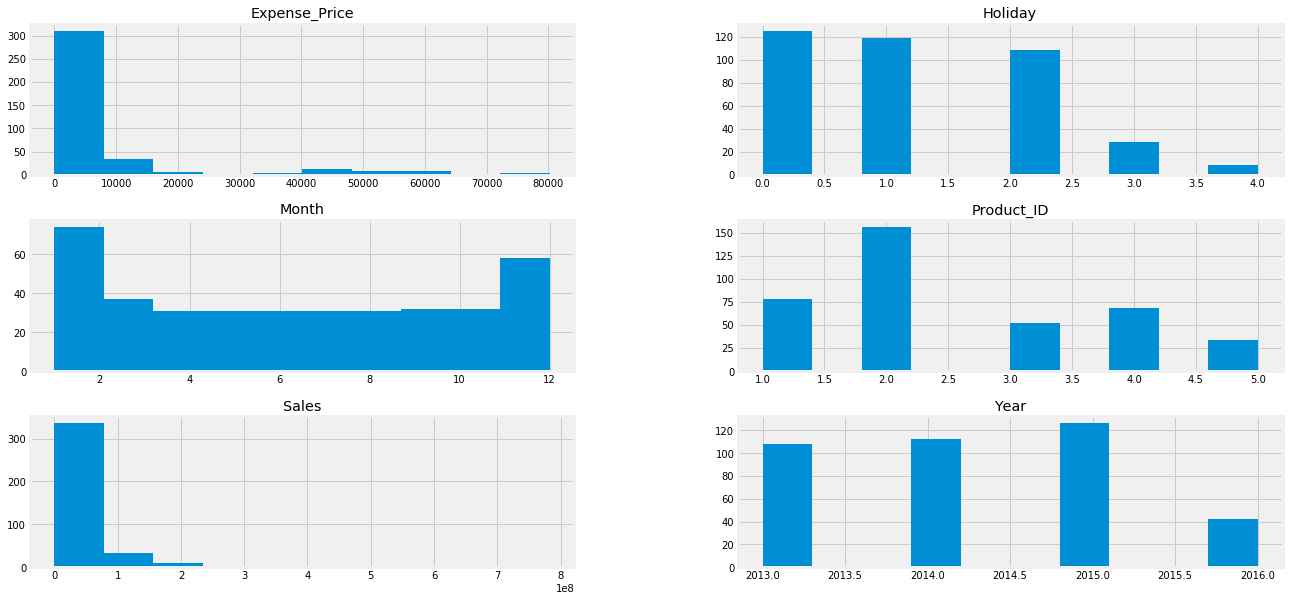

In [7]:
train_new.hist(figsize=(20,10))
plt.show()

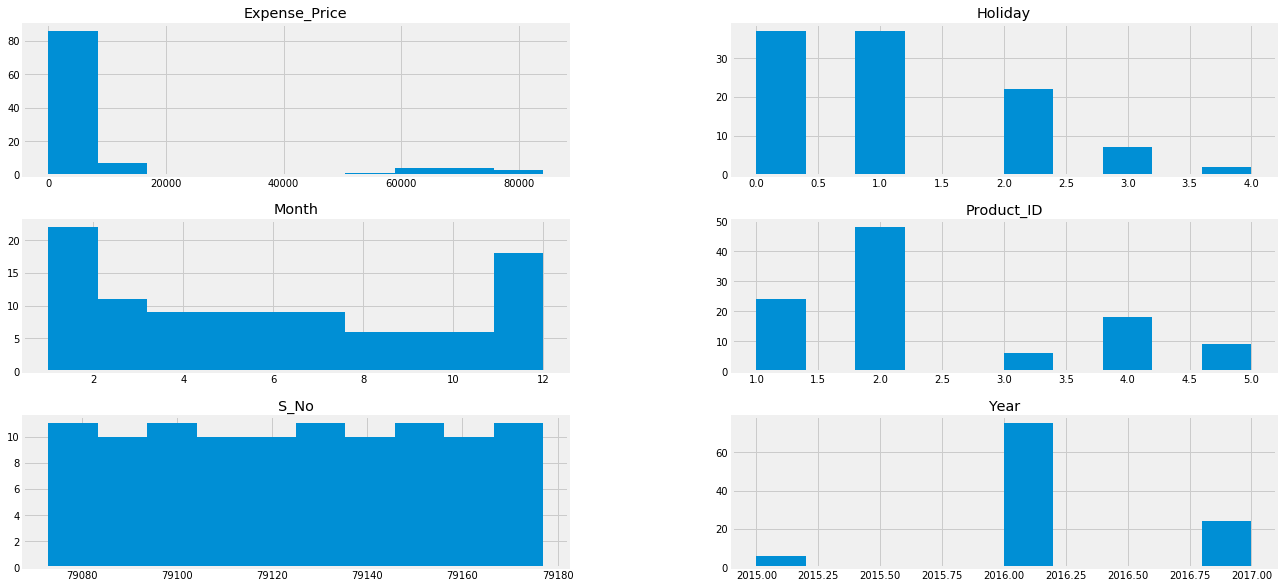

In [8]:
test_new.hist(figsize=(20,10))
plt.show()

In [9]:
train_new['Sales'] = np.log10(1+train_new['Sales'])
train_new['Expense_Price'] = np.log10(1+train_new['Expense_Price'])
test_new['Expense_Price'] = np.log10(1+test_new['Expense_Price'])

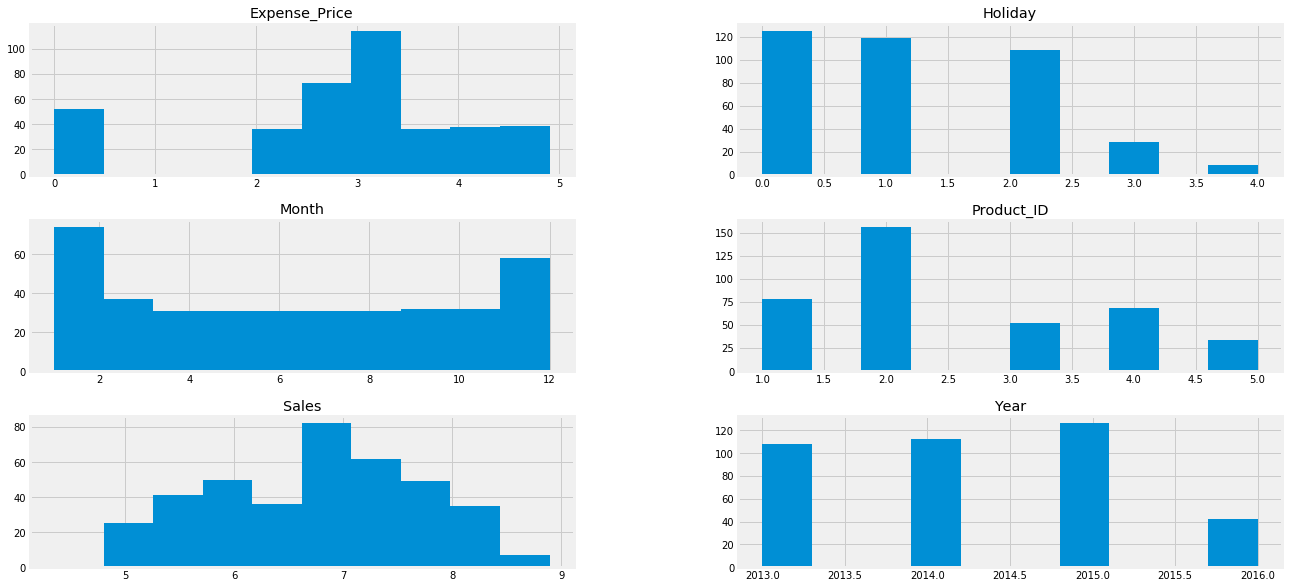

In [10]:
train_new.hist(figsize=(20,10))
plt.show()

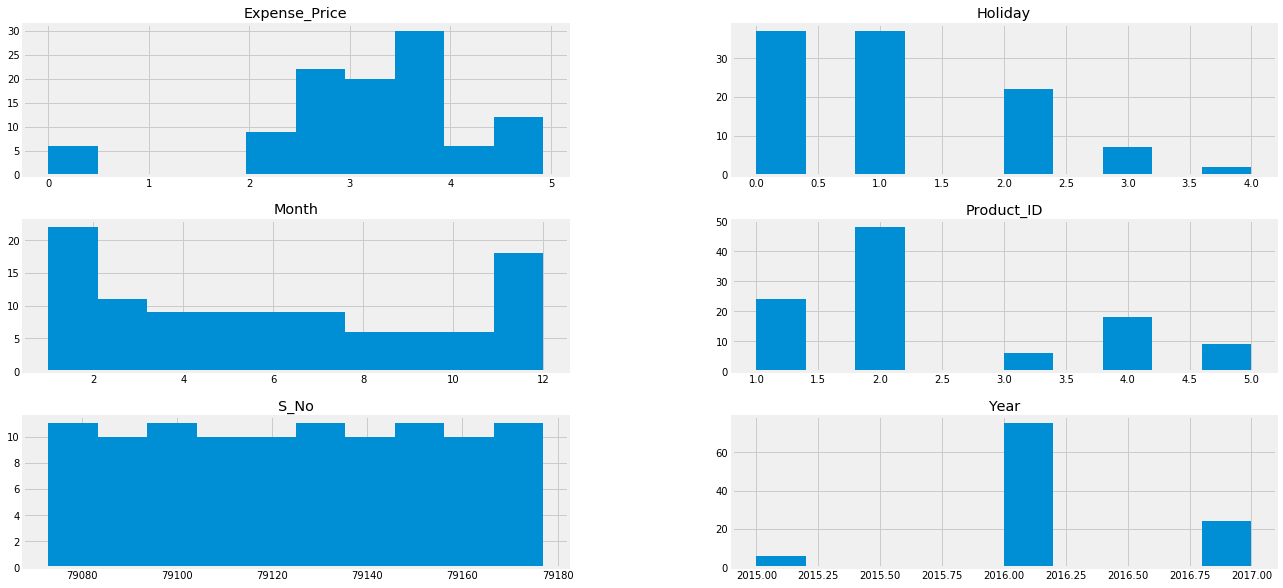

In [11]:
test_new.hist(figsize=(20,10))
plt.show()

### Bivariate Analysis

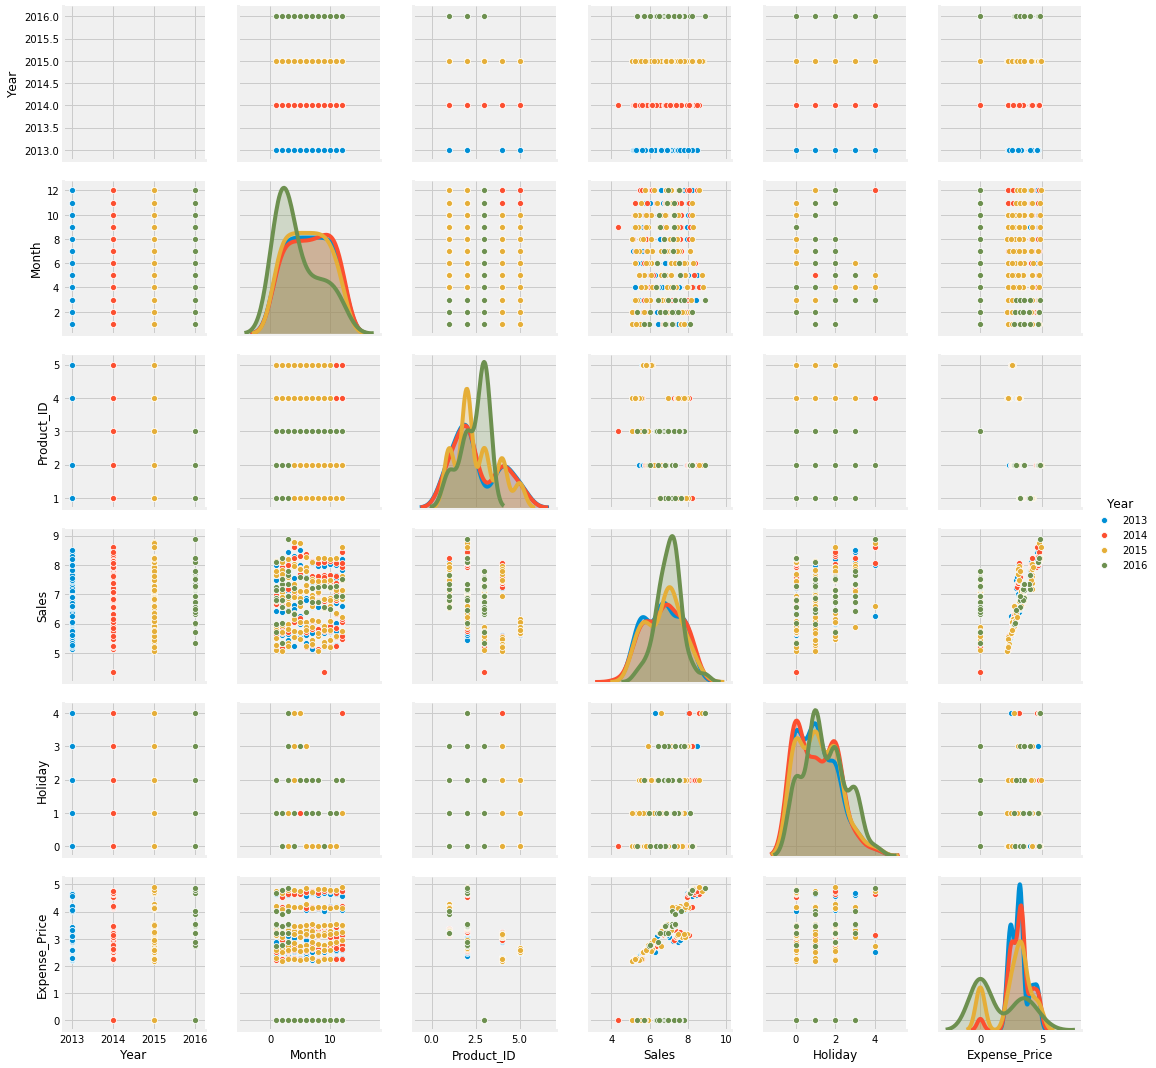

In [12]:
sns.pairplot(train_new,hue='Year')

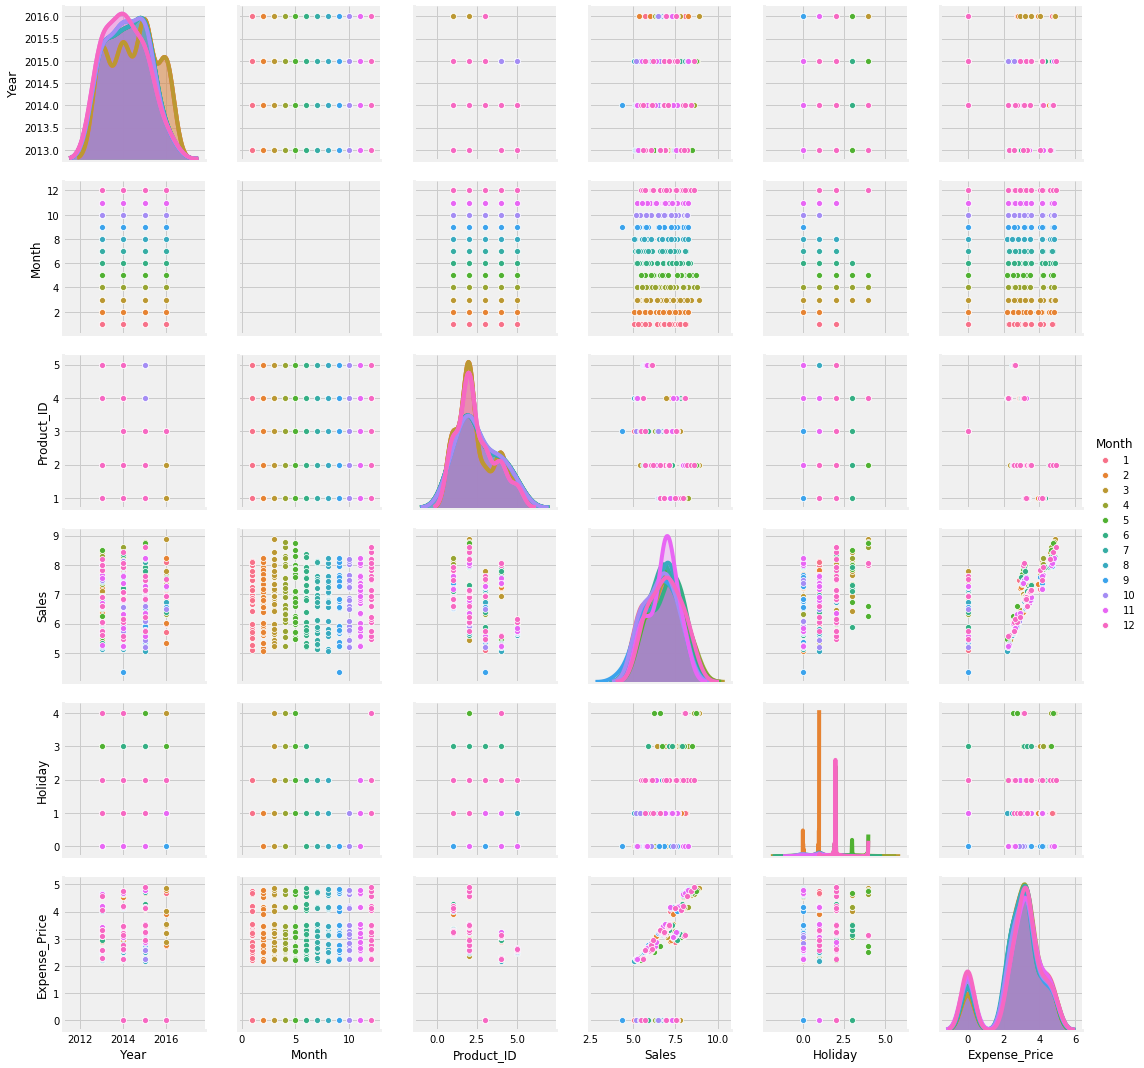

In [13]:
sns.pairplot(train_new,hue = 'Month')

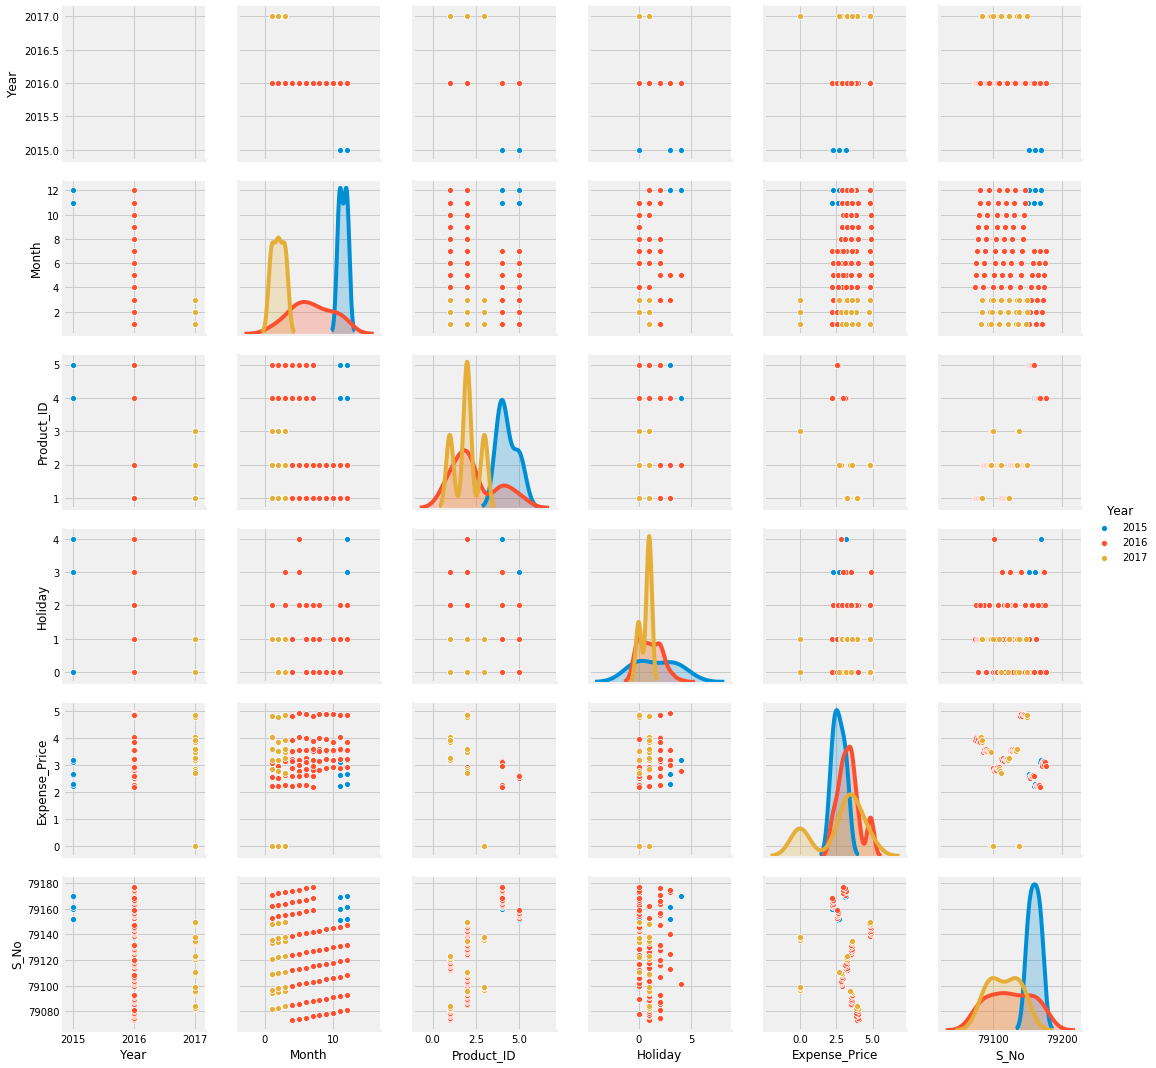

In [14]:
sns.pairplot(test_new,hue='Year')

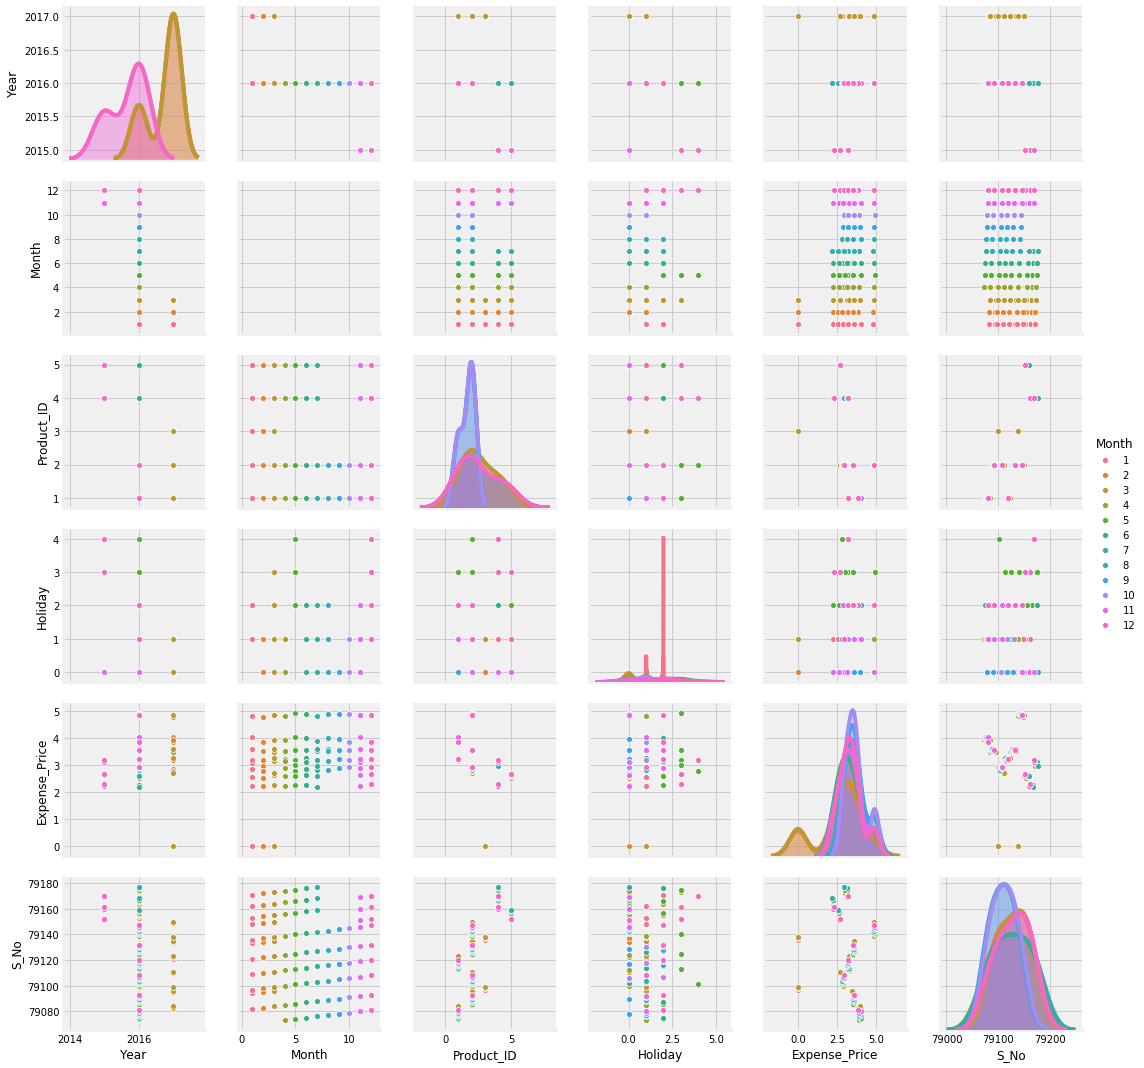

In [15]:
sns.pairplot(test_new,hue='Month')

------------------------------------- Product  1  ----------------------------------------------------------------------


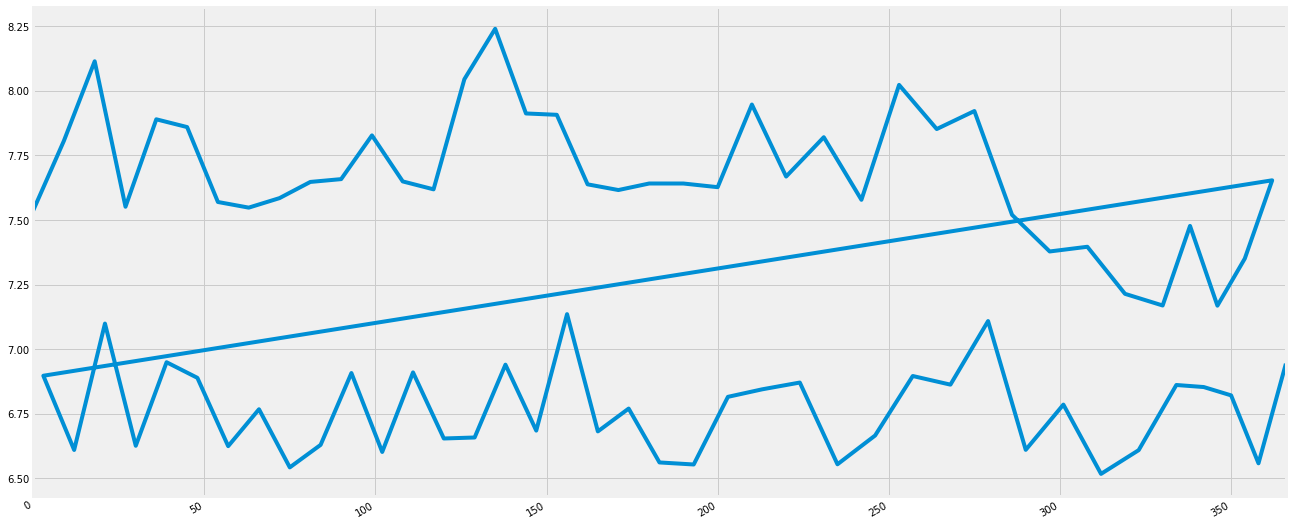

------------------------------------- Product  2  ----------------------------------------------------------------------


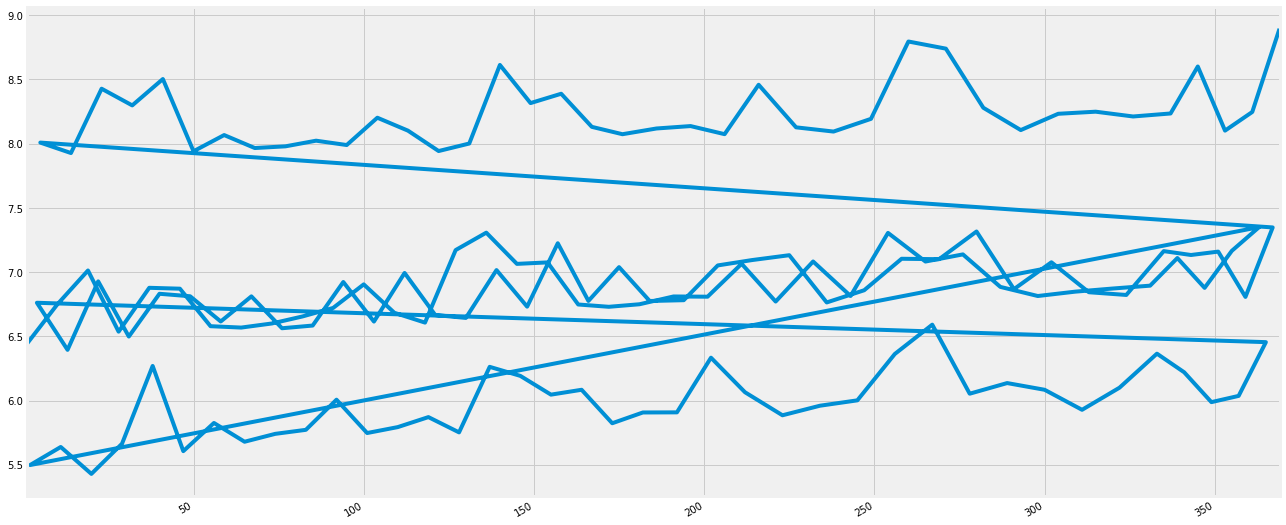

------------------------------------- Product  3  ----------------------------------------------------------------------


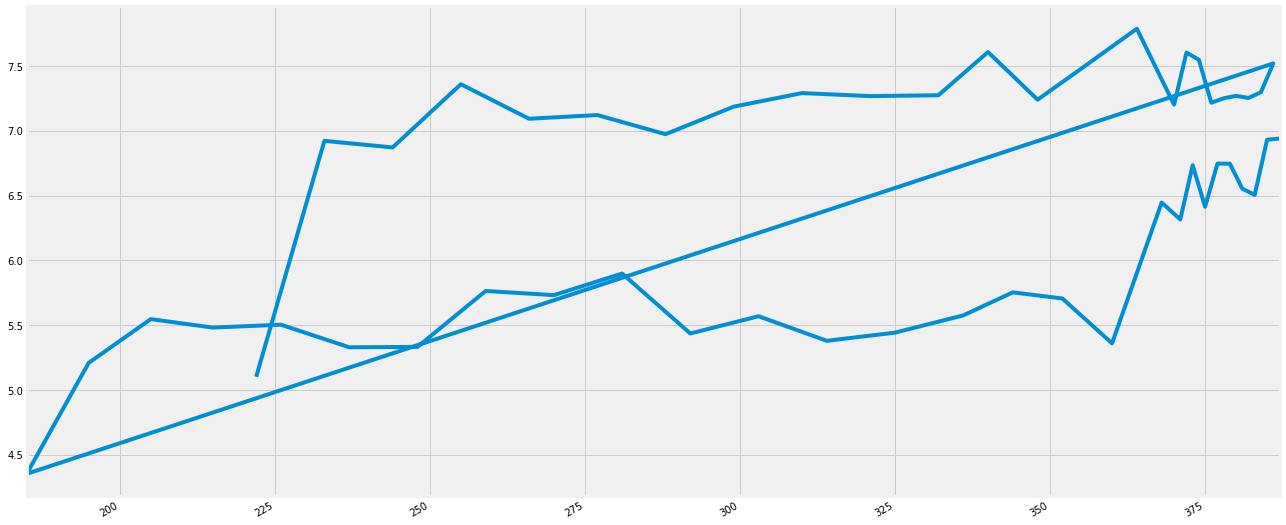

------------------------------------- Product  4  ----------------------------------------------------------------------


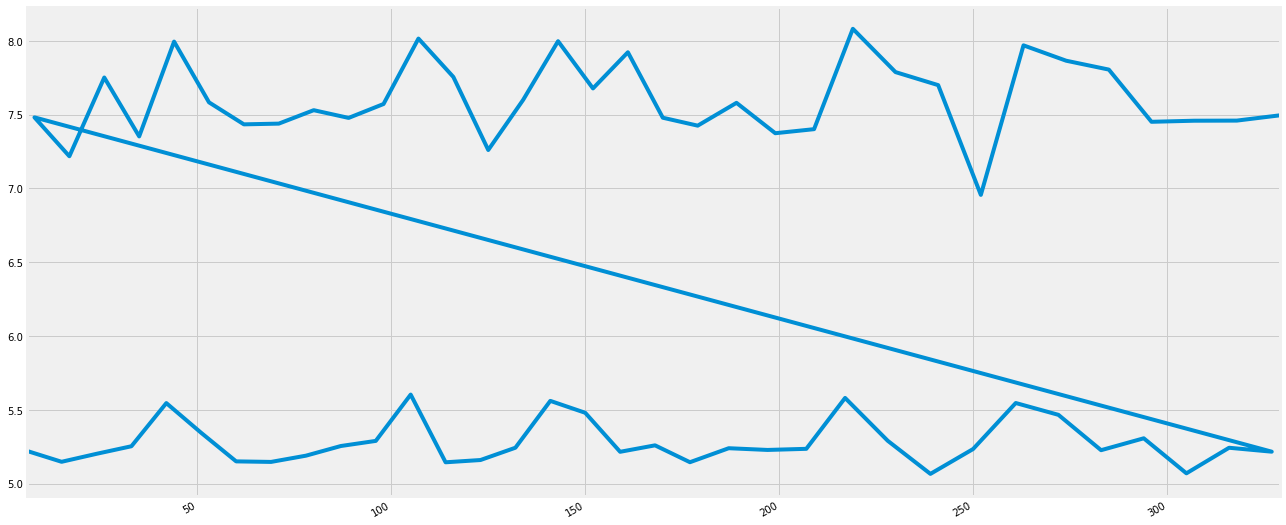

------------------------------------- Product  5  ----------------------------------------------------------------------


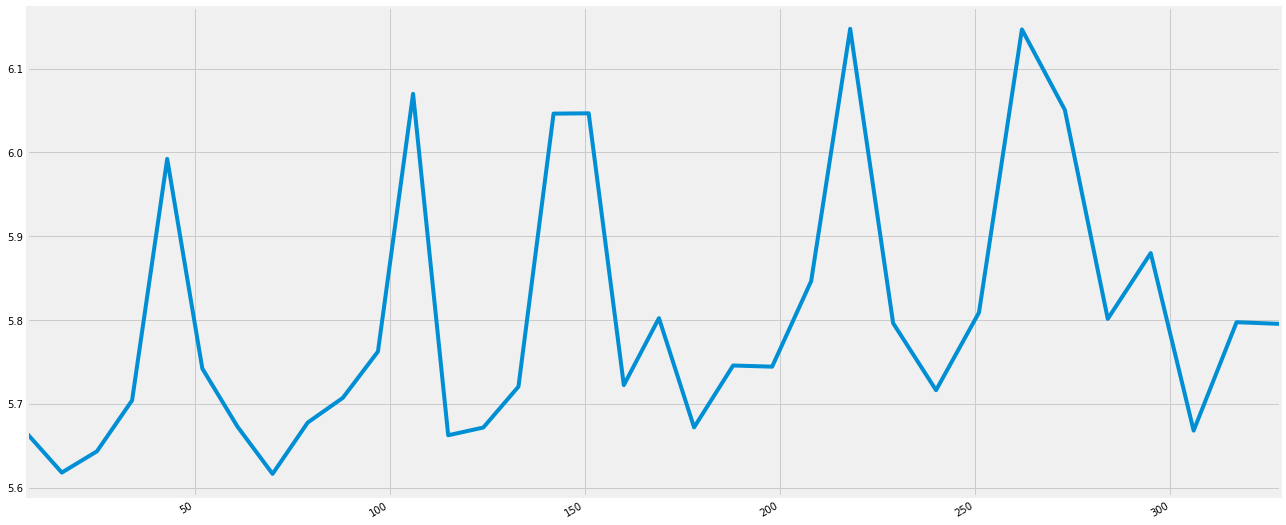

In [57]:
for i in range(1,len(set(train_new['Product_ID']))+1):
    print('------------------------------------- Product ',i,' ----------------------------------------------------------------------')
    train_new[train_new['Product_ID'] == i].sort_values(['Product_ID','Country','Year','Month'])['Sales'].plot(figsize=(20,10),kind='line',subplots=True)
    plt.show()

Product  1  in  Columbia
Product  1  in  Argentina


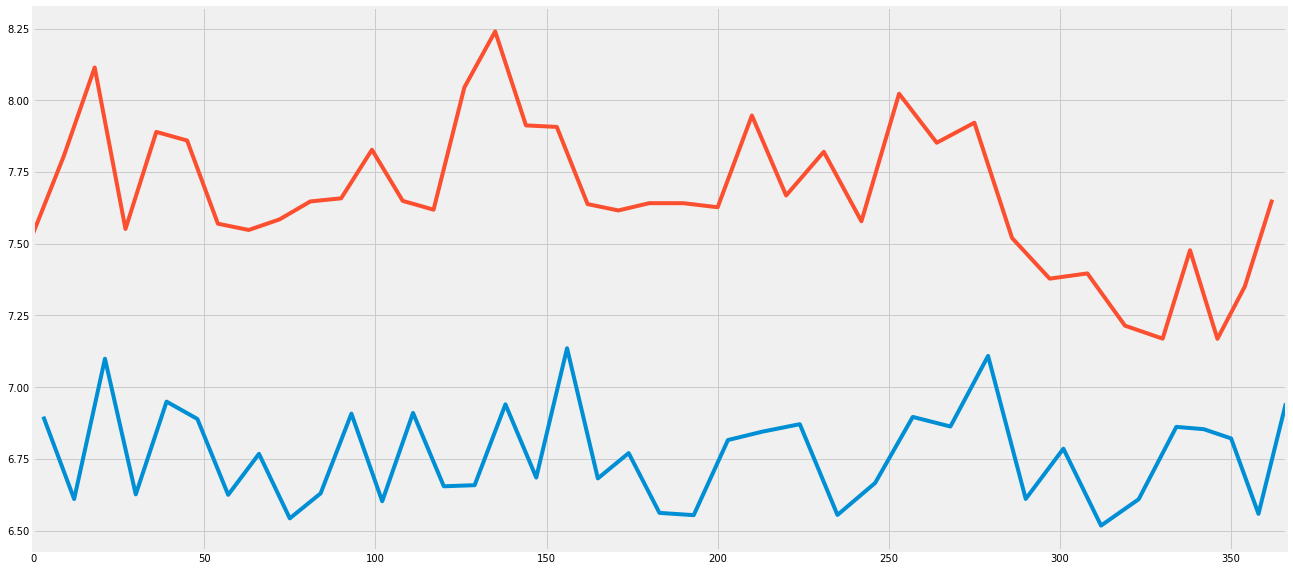

Product  2  in  Belgium
Product  2  in  Columbia
Product  2  in  Denmark
Product  2  in  Argentina


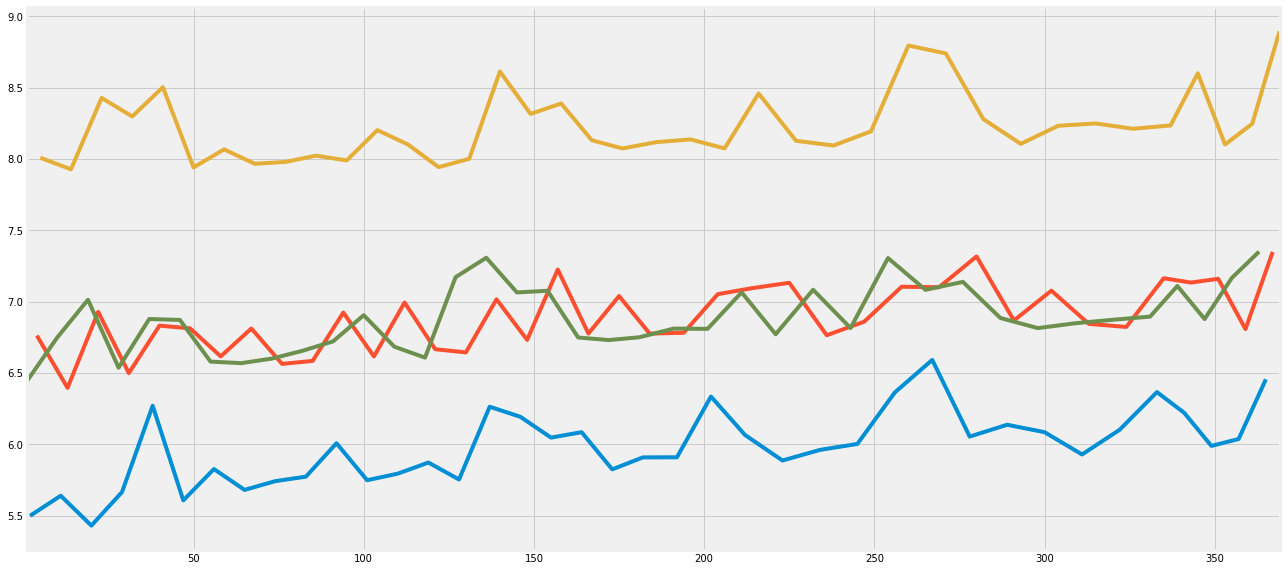

Product  3  in  Columbia
Product  3  in  Argentina


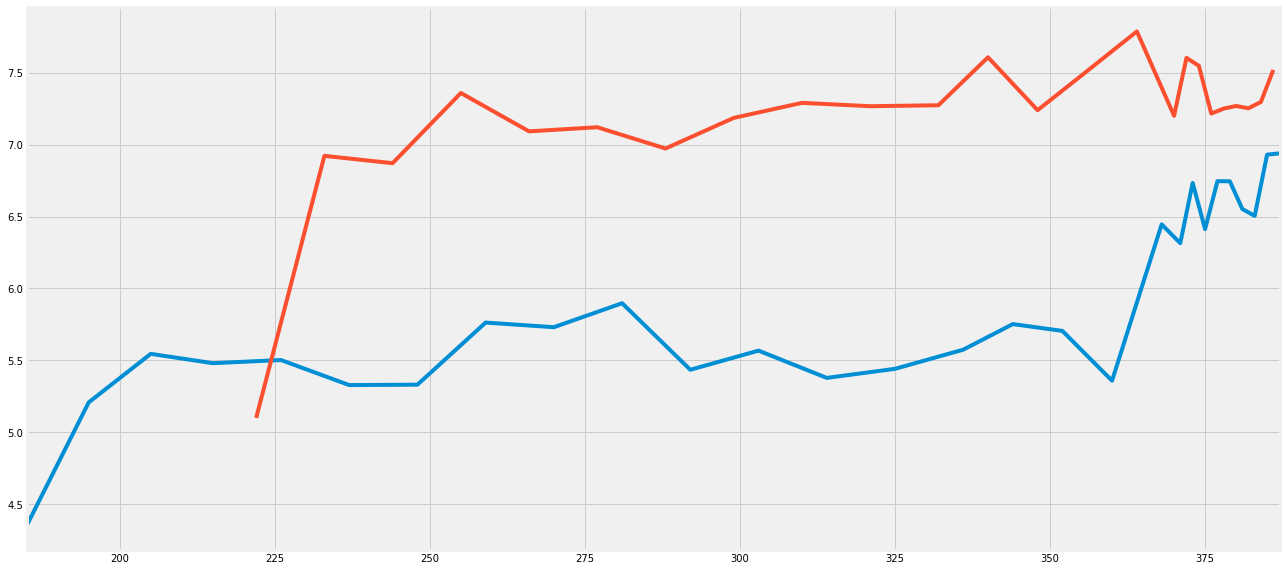

Product  4  in  England
Product  4  in  Finland


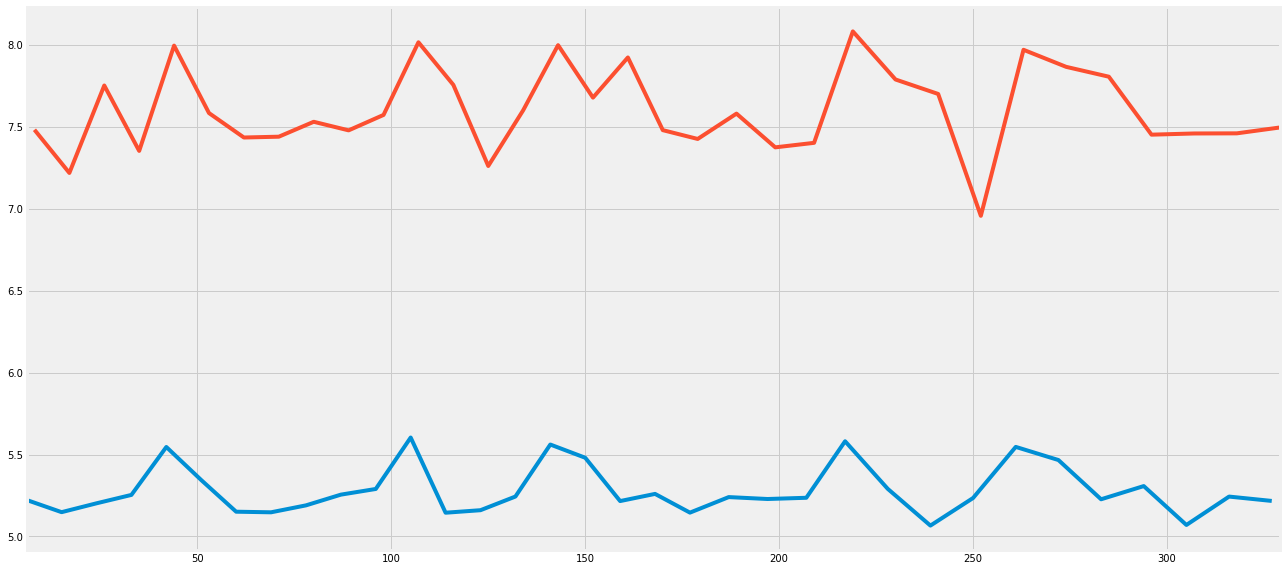

Product  5  in  England


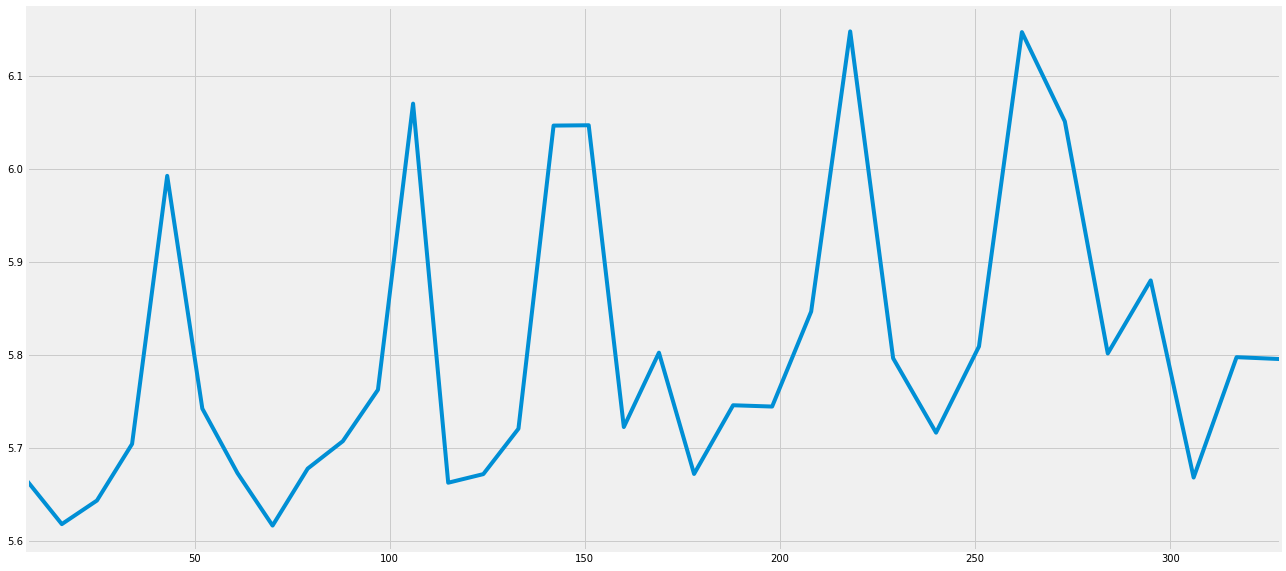

In [61]:
for i in range(1,len(set(train_new['Product_ID']))+1):
    tmp = list(set(train_new[train_new['Product_ID']==i]['Country']))
    for j in tmp:
        print('Product ',i,' in ',j)
        train_new[(train_new['Product_ID']==i)&(train_new['Country']==j)].sort_values(['Year','Month'])['Sales'].plot(figsize=(20,10))
    plt.show()

In [17]:
ohe_cols = ['Country','Product_ID']
le = LabelEncoder()
for i in ohe_cols:
    le.fit(pd.concat([train_new[i],test_new[i]],0))
    train_new[i] = le.transform(train_new[i])
    test_new[i] = le.transform(test_new[i])
    print(train_new.shape,test_new.shape)

#OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
for i in ohe_cols:
    ohe = OneHotEncoder()
    ohe=OneHotEncoder(sparse =False)
    ohe.fit(train_new[i].values.reshape(-1,1))
    tmp=ohe.transform(train_new[i].values.reshape(-1,1))
    tmp=pd.DataFrame(tmp,dtype=int)
    tmp.columns=[i+str(j) for j in range(tmp.shape[1])]
    train_new=train_new.drop([i],1)
    train_new=pd.concat([train_new,tmp],1)
    tmp=ohe.transform(test_new[i].values.reshape(-1,1))
    tmp=pd.DataFrame(tmp,dtype=int)
    tmp.columns=[i+str(j) for j in range(tmp.shape[1])]
    test_new=test_new.drop([i],1)
    test_new=pd.concat([test_new,tmp],1)
    
    print(train_new.shape,' - ',test_new.shape)

(388, 7) (105, 7)
(388, 7) (105, 7)
(388, 12)  -  (105, 12)
(388, 16)  -  (105, 16)


In [18]:
train_new.head()

,Year,Month,Sales,Holiday,Expense_Price,Country0,Country1,Country2,Country3,Country4,Country5,Product_ID0,Product_ID1,Product_ID2,Product_ID3,Product_ID4
0,2013,1,7.535876,1,4.168801,1,0,0,0,0,0,1,0,0,0,0
1,2013,1,6.439625,1,3.123974,1,0,0,0,0,0,0,1,0,0,0
2,2013,1,5.498105,1,2.398964,0,1,0,0,0,0,0,1,0,0,0
3,2013,1,6.897336,2,3.277408,0,0,1,0,0,0,1,0,0,0,0
4,2013,1,6.761197,2,3.157676,0,0,1,0,0,0,0,1,0,0,0


In [19]:
# Since Month is a cyclic feature, we need to sin and cos transform it
months_in_year = 12
train_new['sin_month'] = np.sin(2*np.pi*train_new.Month/months_in_year)
train_new['cos_month'] = np.cos(2*np.pi*train_new.Month/months_in_year)

test_new['sin_month'] = np.sin(2*np.pi*test_new.Month/months_in_year)
test_new['cos_month'] = np.cos(2*np.pi*test_new.Month/months_in_year)

train_new = train_new.drop(['Month'],1)
test_new = test_new.drop(['Month'],1)

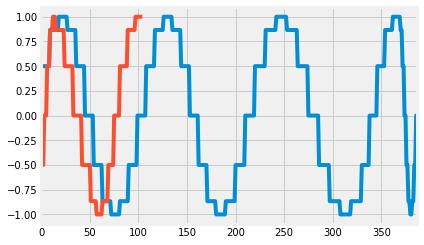

In [20]:
train_new.sin_month.plot()
test_new.sin_month.plot()
plt.show()

In [31]:
x = pd.concat([train_new['Year'],test_new['Year']],0)

In [44]:
sc = MinMaxScaler()
sc.fit(x.values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
train_new['Year'] = sc.transform(train_new['Year'].values.reshape(-1,1))
test_new['Year'] = sc.transform(test_new['Year'].values.reshape(-1,1))

In [47]:
sc = MinMaxScaler()
sc.fit(pd.concat([train_new['Holiday'],test_new['Holiday']],0).values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [48]:
train_new['Holiday'] = sc.transform(train_new['Holiday'].values.reshape(-1,1))
test_new['Holiday'] = sc.transform(test_new['Holiday'].values.reshape(-1,1))

In [52]:
train_new.to_csv('Data/processed_train.csv',index=False)
test_new.to_csv('Data/processed_test.csv',index=False)